In [78]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

from cinnamon.drift import AdversarialDriftExplainer

from sklearn.preprocessing import LabelEncoder

from cinnamon.drift import ModelDriftExplainer

RANDOM_SEED = 2021

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)


# Housing Data

In [4]:
#import os, ssl
#if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
#    getattr(ssl, '_create_unverified_context', None)): 
#    ssl._create_default_https_context = ssl._create_unverified_context

If you run into a SSL certificate error executing this cell, uncommenting and running the above cell should solve the problem
see https://github.com/scikit-learn/scikit-learn/issues/10201#issuecomment-365734582 

In [5]:
gas_drift = fetch_openml(name="gas-drift", as_frame=True)

In [10]:
gas_drift_df = pd.DataFrame(data=gas_drift.data, columns=gas_drift.feature_names)

In [84]:
gas_drift_df.shape

(13910, 128)

In [11]:
gas_drift_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,5.722523,9.379276,12.391131,-1.388754,-1.989407,-6.051796,1376.0439,1.617861,1.071686,2.691709,5.254568,-0.238784,-0.502758,-2.692017,1406.0798,1.597323,1.125200,2.875145,6.113454,-0.241244,-0.539790,-3.087659,627.1431,1.521896,0.654415,2.108112,4.642270,-0.125025,-0.390274,-2.419372,539.4646,1.682275,0.515317,1.645235,3.817461,-0.103626,-0.331580,-2.090179,1800.6111,1.801916,1.788996,4.826689,7.203587,-0.332063,-0.626726,-2.911391,1853.5234,1.771225,1.838251,5.086593,8.096120,-0.337872,-0.679026,-3.402572,14076.0683,3.747051,5.657922,8.886663,12.997128,-1.528725,-2.374023,-11.116693,11212.5313,3.634597,4.259145,6.428518,9.466147,-1.160674,-1.910749,-7.928730,1580.4724,1.665219,1.096551,2.640160,4.979348,-0.259215,-0.591381,-3.949096,1265.0924,1.651775,0.937309,2.323621,5.073649,-0.213805,-0.486809,-3.713366,685.8847,1.646146,0.689340,2.349164,5.722172,-0.139009,-0.465744,-3.800066,707.6450,1.711209,0.682624,2.324433,5.518862,-0.141492,-0.409681,-3.123773,2018.0422,1.836452,1.838720,4.993373,7.822702,-0.349244,-0.747592,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663
1,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,1.053988,0.252687,0.559487,3.423493,-0.135535,-0.578300,-2.932816,1175.7173,1.522478,0.892762,1.723403,4.208079,-0.182931,-0.521362,-3.299125,1191.2175,1.496735,0.927999,1.815678,4.144909,-0.193502,-0.545734,-3.385026,252.0190,1.201904,0.281837,0.826969,2.596229,-0.067213,-0.350667,-2.891391,188.9178,1.229708,0.210524,0.611304,2.648002,-0.056554,-0.286360,-2.189327,1081.2488,1.460447,1.199081,2.718960,4.759043,-0.205275,-0.485027,-3.134272,1191.3608,1.474226,1.289649,2.871159,5.486517,-0.224706,-0.565582,-4.192426,-10.3501,0.998603,0.218032,0.708032,5.664335,-0.157366,-0.623495,-5.268908,-91.1933,0.985175,0.156704,0.546789,5.102834,-0.130522,-0.519166,-3.816096,1288.6491,1.528458,0.947784,1.826082,5.610227,-0.205882,-0.532922,-4.564120,934.8774,1.468812,0.770281,1.593103,4.919168,-0.164006,-0.477857,-4.180351,214.9796,1.190208,0.270743,0.835907,4.290327,-0.070615,-0.400671,-3.366526,272.7891,1.263393,0.281797,0.820301,3.928816,-0.073675,-0.423613,-3.396556,1116.7353,1.438412,1.262702,2.892257,6.930972,-0.218152,-0.622342,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,20.250266,32.577490,37.525114,-9.756099,-14.109473,-44.929168,12304.2205,6.392772,3.964342,7.366502,9.704410,-2.726624,-4.132365,-10.335102,12430.6953,6.145937,4.028903,7.585530,11.635086,-2.780343,-4.164347,-11.397157,3845.5513,4.165718,1.609684,4.022781,6.214146,-0.919059,-1.599611,-4.384381,3020.5721,4.715781,1.226513,3.112343,5.282834,-0.688166,-1.242500,-3.934958,14970.6416,7.455523,6.043319,11.904249,15.251811,-3.944826,-6.672673,-17.767853,15614.0096,7.265349,6.220330,12.225191,16.442232,-4.120191,-6.976463,-17.730782,62797.0669,11.568555,20.215164,30.387015,37.959544,-9.297549,-14.824328,-60.945409,50878.3696,11.376530,15.964343,23.009740,30.686171,-7.453153,-11.685575,-48.451406,13615.2168,6.505886,4.451585,7.487236,10.530671,-2.949599,-4.506962,-10.853676,10803.5973,6.440645,3.558823,6.341714,8.951311,-2.344393,-3.568995,-10.005102,4018.8239,4.716139,1.719803,4.432929,7.836516,-0.961312,-1.909178,-5.561091,

In [12]:
gas_drift.target

0        4
1        3
2        4
3        3
4        4
        ..
13905    6
13906    6
13907    6
13908    6
13909    6
Name: Class, Length: 13910, dtype: category
Categories (6, object): ['1', '2', '3', '4', '5', '6']

In [16]:
gas_drift_df.isnull().sum(axis=0)

V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
V20     0
V21     0
V22     0
V23     0
V24     0
V25     0
V26     0
V27     0
V28     0
V29     0
V30     0
V31     0
V32     0
V33     0
V34     0
V35     0
V36     0
V37     0
V38     0
V39     0
V40     0
V41     0
V42     0
V43     0
V44     0
V45     0
V46     0
V47     0
V48     0
V49     0
V50     0
V51     0
V52     0
V53     0
V54     0
V55     0
V56     0
V57     0
V58     0
V59     0
V60     0
V61     0
V62     0
V63     0
V64     0
V65     0
V66     0
V67     0
V68     0
V69     0
V70     0
V71     0
V72     0
V73     0
V74     0
V75     0
V76     0
V77     0
V78     0
V79     0
V80     0
V81     0
V82     0
V83     0
V84     0
V85     0
V86     0
V87     0
V88     0
V89     0
V90     0
V91     0
V92     0
V93     0
V94     0
V95     0
V96     0
V97     0
V98     0
V99     0
V100    0


In [25]:
le = LabelEncoder()

target = le.fit_transform(gas_drift.target)

In [26]:
target

array([3, 2, 3, ..., 5, 5, 5])

In [85]:
X_train, X_temp, y_train, y_temp = train_test_split(gas_drift_df,
                                                    target,
                                                    test_size=0.5,
                                                    shuffle=False)


In [86]:
X_test, X_prod, y_test, y_prod = train_test_split(X_temp,
                                                    y_temp,
                                                    test_size=0.5,
                                                    shuffle=False)


In [87]:
clf = XGBClassifier(n_estimators=1000,
                    booster="gbtree",
                    learning_rate=0.05,
                    max_depth=6,
                    use_label_encoder=False,
                    seed=2021,
                    early_stopping_rounds=20)

clf.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], verbose=10)

[0]	validation_0-mlogloss:1.70363
[10]	validation_0-mlogloss:1.24993
[20]	validation_0-mlogloss:0.97143
[30]	validation_0-mlogloss:0.80367
[40]	validation_0-mlogloss:0.71518
[50]	validation_0-mlogloss:0.65509
[60]	validation_0-mlogloss:0.61753
[70]	validation_0-mlogloss:0.59801
[80]	validation_0-mlogloss:0.58636
[90]	validation_0-mlogloss:0.56665
[100]	validation_0-mlogloss:0.55257
[110]	validation_0-mlogloss:0.54332
[120]	validation_0-mlogloss:0.54541
[130]	validation_0-mlogloss:0.55110
[133]	validation_0-mlogloss:0.54904


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=20, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=2021, reg_alpha=0, ...)

# ModelDriftExplainer

The experiment is done with a random split so we should not detect a data drift

In [88]:
# CinnaMon can support regression pipeline if the pipe.predict method is implemented
drift_explainer = ModelDriftExplainer(clf, task='classification')

In [89]:
drift_explainer.fit(X_test, X_prod, y_test, y_prod)

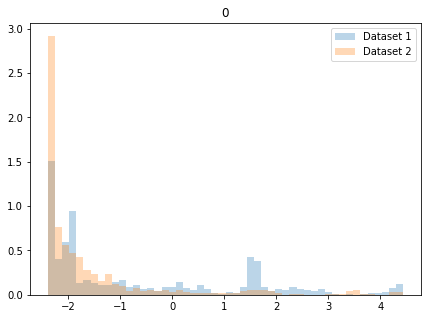

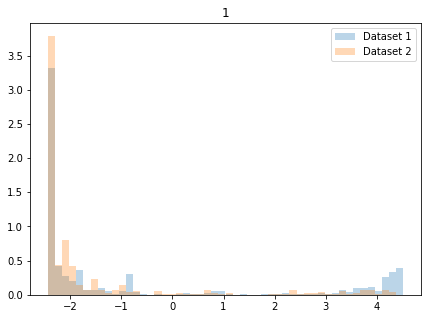

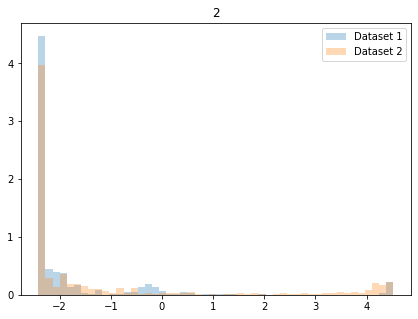

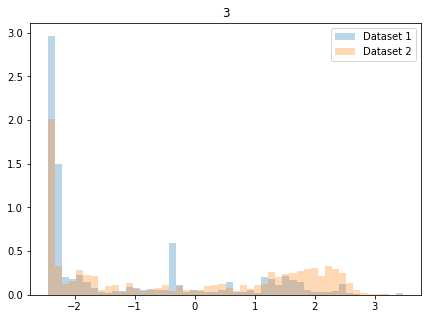

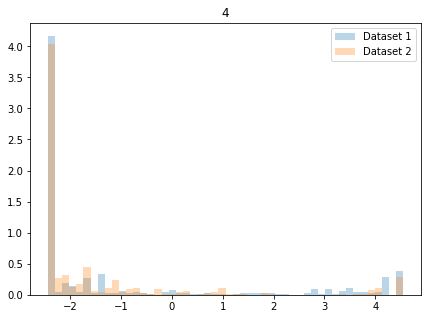

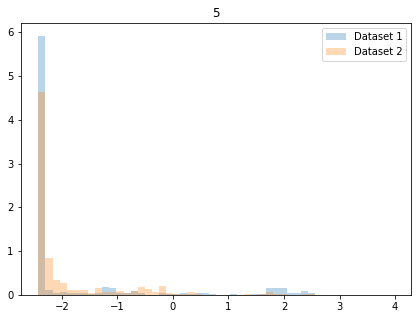

[DriftMetricsNum(mean_difference=-0.964830518403476, wasserstein=0.9651616059638352, ks_test=BaseStatisticalTestResult(statistic=0.2722047768768162, pvalue=5.8830175144931454e-114)),
 DriftMetricsNum(mean_difference=-0.9609196877833168, wasserstein=0.9609196877833169, ks_test=BaseStatisticalTestResult(statistic=0.1795052446017144, pvalue=2.1726650110986585e-49)),
 DriftMetricsNum(mean_difference=0.6416015030388929, wasserstein=0.6431071192767418, ks_test=BaseStatisticalTestResult(statistic=0.13622907323456218, pvalue=1.25573471175056e-28)),
 DriftMetricsNum(mean_difference=1.0367291829089633, wasserstein=1.039006363337463, ks_test=BaseStatisticalTestResult(statistic=0.27101417133175987, pvalue=9.504203068776717e-113)),
 DriftMetricsNum(mean_difference=-0.5078027021521931, wasserstein=0.5195499923271927, ks_test=BaseStatisticalTestResult(statistic=0.11794147790880118, pvalue=1.6226400658641921e-21)),
 DriftMetricsNum(mean_difference=-0.1530823481491288, wasserstein=0.24589091280632489, 

In [90]:
# no apparent drift in distributions of predictions
drift_explainer.plot_prediction_drift(bins=50)
drift_explainer.get_prediction_drift()

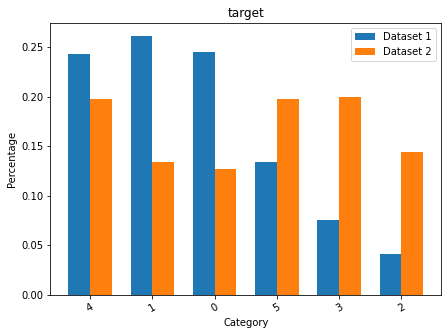

DriftMetricsCat(wasserstein=0.29003715039916456, jensen_shannon=0.2318318473376907, chi2_test=Chi2TestResult(statistic=723.4415077990996, pvalue=4.191758336200421e-154, dof=5, contingency_table=        0      1      2      3      4      5
X1  853.0  908.0  142.0  263.0  844.0  467.0
X2  441.0  468.0  500.0  694.0  688.0  687.0))

In [91]:
# no apparent drift in distributions of target labels
drift_explainer.plot_target_drift()
drift_explainer.get_target_drift()

In [92]:
# here we would detect a data drift but in fact the difference in performance metrics
# is due to comparing train and test dataset
drift_explainer.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=ClassificationMetrics(accuracy=0.8717285015818234, log_loss=0.5416379289591494), dataset2=ClassificationMetrics(accuracy=0.6184588844163312, log_loss=1.1344268778317605))

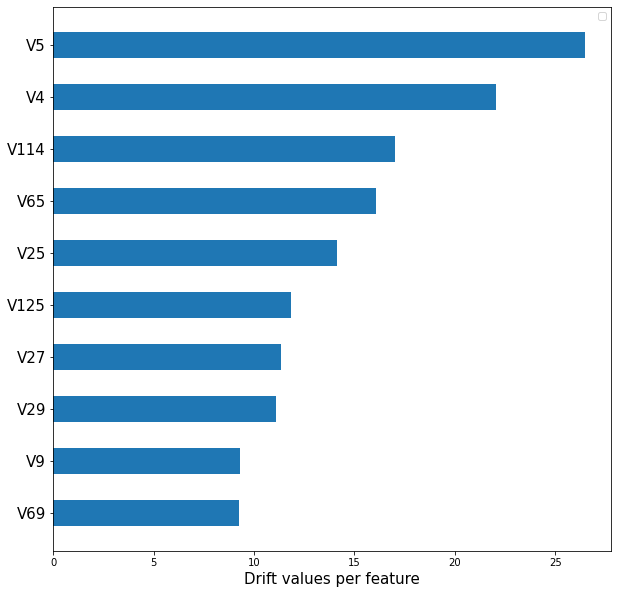

In [138]:
drift_explainer.plot_tree_based_drift_importances(type='node_size', n=10)

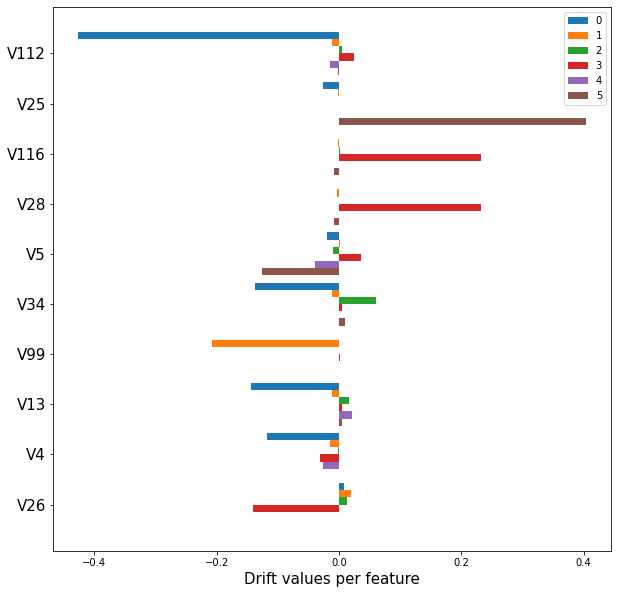

In [93]:
drift_explainer.plot_tree_based_drift_importances(type='mean', n=10)

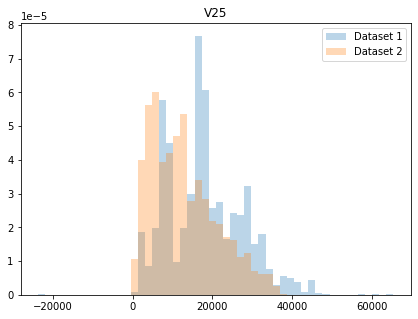

DriftMetricsNum(mean_difference=-5282.186282226701, wasserstein=5295.802137481962, ks_test=BaseStatisticalTestResult(statistic=0.30582759985399827, pvalue=3.8031902480177843e-144))

In [145]:
drift_explainer.plot_feature_drift('V25', bins=50)
drift_explainer.get_feature_drift('V25')

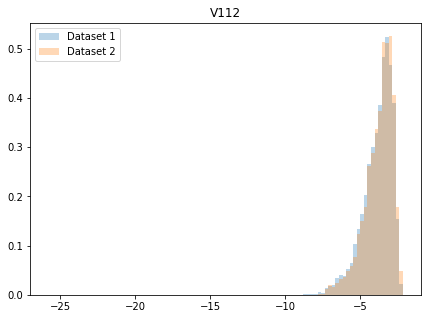

In [115]:
drift_explainer2.plot_feature_drift('V112', bins=100)

In [62]:
drift_explainer.X1['V10'].describe()

count    9737.000000
mean        6.789976
std         6.704545
min         0.486850
25%         2.801893
50%         4.922769
75%         8.755102
max       290.619975
Name: V10, dtype: float64

In [60]:
drift_explainer.get_feature_drift('V10')

DriftMetricsNum(mean_difference=-0.4731429598438943, wasserstein=1.333857562288229, ks_test=BaseStatisticalTestResult(statistic=0.11574406901509705, pvalue=1.5893301697135736e-34))

In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
drift_explainer.X2['V112'].min()

-7.795969

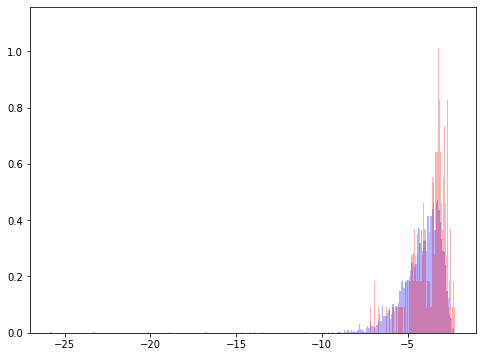

In [101]:
plt.subplots(figsize = (8, 6))
plt.hist(drift_explainer.X1['V112'].values, bins=300, color='blue', alpha=0.3, density=True)
plt.hist(drift_explainer.X2['V112'].values, bins=300*6, color='red', alpha=0.3, density=True)
plt.show()

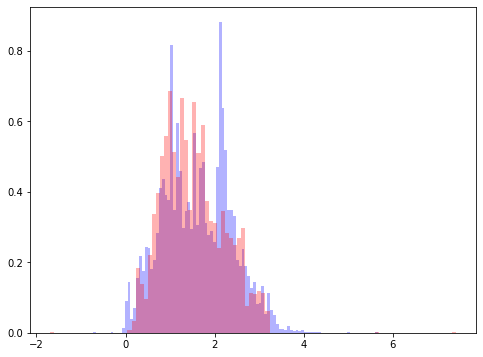

In [59]:
plt.subplots(figsize = (8, 6))
plt.hist(np.log(drift_explainer.X1['V10'].values), bins=100, color='blue', alpha=0.3, density=True)
plt.hist(np.log(drift_explainer.X2['V10'].values), bins=100, color='red', alpha=0.3, density=True)
plt.show()

In [71]:
drift_explainer.X1.shape

(9737, 128)

0


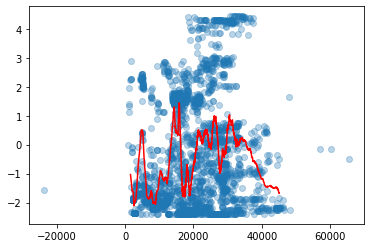

1


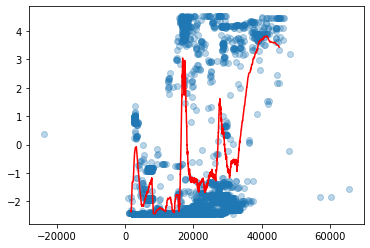

2


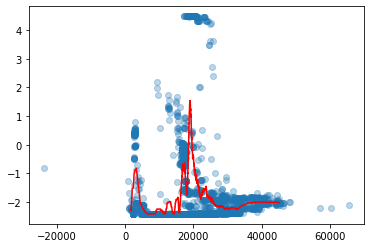

3


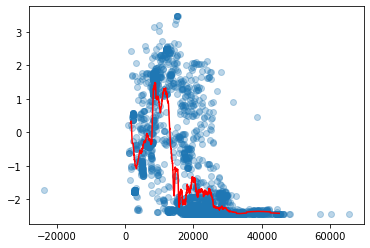

4


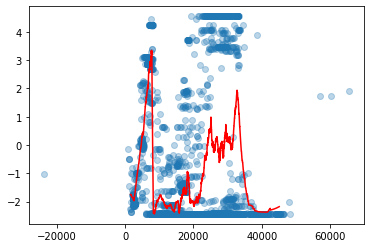

5


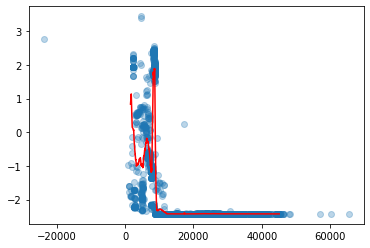

In [141]:
for i in range(6):
    print(i)
    plt.scatter(drift_explainer.X1['V25'].values, drift_explainer.predictions1[:, i], alpha=0.3)
    plt.plot(drift_explainer.X1['V25'].sort_values().rolling(window=100, min_periods=1, center=True).mean(),
                pd.Series(drift_explainer.predictions1[np.argsort(drift_explainer.X1['V25']), i]).rolling(window=100, min_periods=1, center=True).mean(),
             color='red')
    plt.show()

In [128]:
sample_weights_test_adversarial3 = drift_explainer.get_tree_based_correction_weights(max_depth=3, max_ratio=10)

In [129]:
# study the drift with the new weights on test data
drift_explainer3 = ModelDriftExplainer(clf)
drift_explainer3.fit(X1=X_test, X2=X_prod, y1=y_test, y2=y_prod,
                     sample_weights1=sample_weights_test_adversarial3)

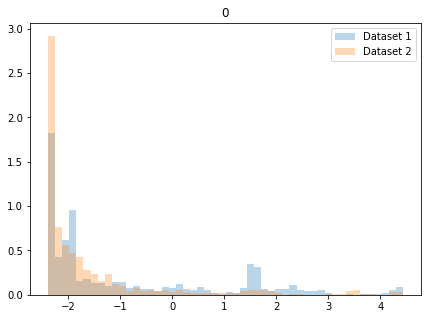

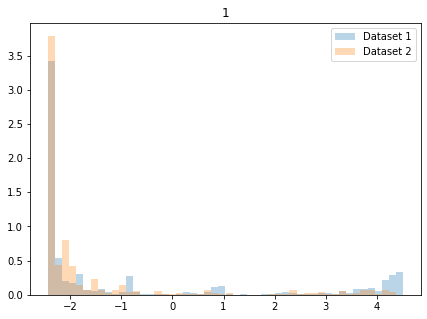

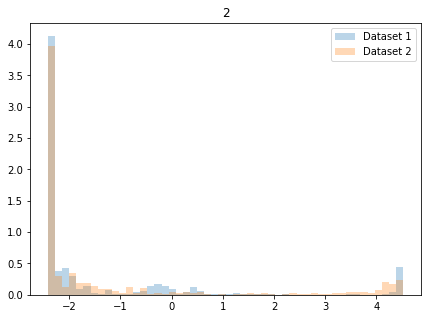

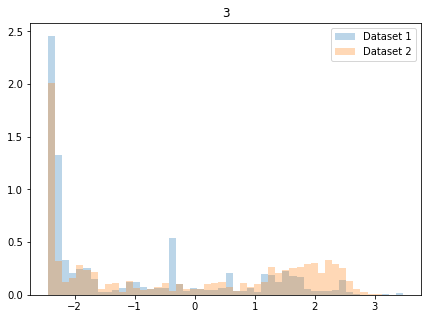

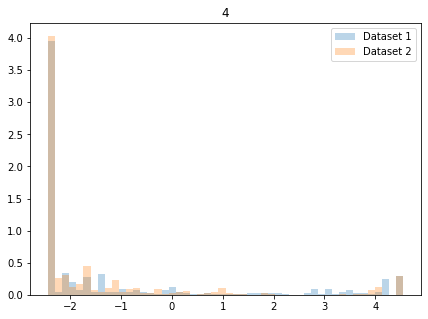

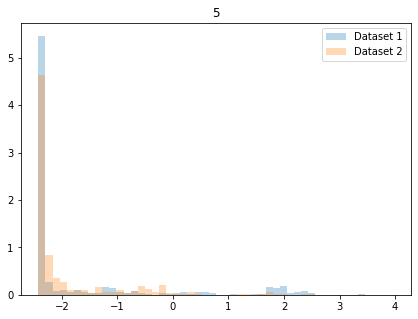

[DriftMetricsNum(mean_difference=-0.7361798031076139, wasserstein=0.7364733336064706, ks_test=BaseStatisticalTestResult(statistic=0.22104138291434033, pvalue=4.1882103205075903e-75)),
 DriftMetricsNum(mean_difference=-0.8620234156535659, wasserstein=0.8620234156535721, ks_test=BaseStatisticalTestResult(statistic=0.17757108696942847, pvalue=1.942115794720232e-48)),
 DriftMetricsNum(mean_difference=0.29607310748510307, wasserstein=0.3140240311011326, ks_test=BaseStatisticalTestResult(statistic=0.07787141413294862, pvalue=1.2816529396670644e-09)),
 DriftMetricsNum(mean_difference=0.9135832696142197, wasserstein=0.9161168441750668, ks_test=BaseStatisticalTestResult(statistic=0.24029968949495978, pvalue=7.340516543336575e-89)),
 DriftMetricsNum(mean_difference=-0.36424758445291805, wasserstein=0.36697689478775664, ks_test=BaseStatisticalTestResult(statistic=0.0836734893189075, pvalue=4.856993473001157e-11)),
 DriftMetricsNum(mean_difference=-0.23334476735971976, wasserstein=0.28245805877537

In [130]:
# with new weigts on test data, distributions of predictions are much closer
drift_explainer3.plot_prediction_drift(bins=50)
drift_explainer3.get_prediction_drift()

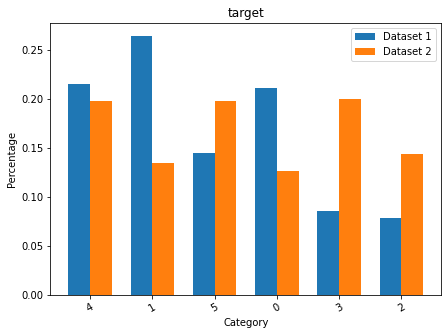

DriftMetricsCat(wasserstein=0.23181539786106264, jensen_shannon=0.18648689217016012, chi2_test=Chi2TestResult(statistic=474.7422744558671, pvalue=2.2556520312872244e-100, dof=5, contingency_table=            0           1          2           3           4           5
X1  734.44736  918.451699  272.43021  299.208155  749.663908  502.798668
X2  441.00000  468.000000  500.00000  694.000000  688.000000  687.000000))

In [131]:
# distribution of target if also corrected
drift_explainer3.plot_target_drift()
drift_explainer3.get_target_drift()

In [ ]:
clf.feature_importances_

In [132]:
ade = AdversarialDriftExplainer(seed=2021).fit(X_test, X_prod)

[0]	validation_0-error:0.04773	validation_0-auc:0.96764	validation_0-logloss:0.61336
[10]	validation_0-error:0.03997	validation_0-auc:0.98647	validation_0-logloss:0.25727
[20]	validation_0-error:0.03278	validation_0-auc:0.99402	validation_0-logloss:0.14462
[30]	validation_0-error:0.02617	validation_0-auc:0.99651	validation_0-logloss:0.09527
[40]	validation_0-error:0.02214	validation_0-auc:0.99738	validation_0-logloss:0.07261
[50]	validation_0-error:0.02013	validation_0-auc:0.99785	validation_0-logloss:0.06214
[60]	validation_0-error:0.01812	validation_0-auc:0.99796	validation_0-logloss:0.05763
[70]	validation_0-error:0.01783	validation_0-auc:0.99806	validation_0-logloss:0.05485
[80]	validation_0-error:0.01668	validation_0-auc:0.99811	validation_0-logloss:0.05318
[90]	validation_0-error:0.01697	validation_0-auc:0.99811	validation_0-logloss:0.05230
[100]	validation_0-error:0.01668	validation_0-auc:0.99811	validation_0-logloss:0.05180
[110]	validation_0-error:0.01725	validation_0-auc:0.99

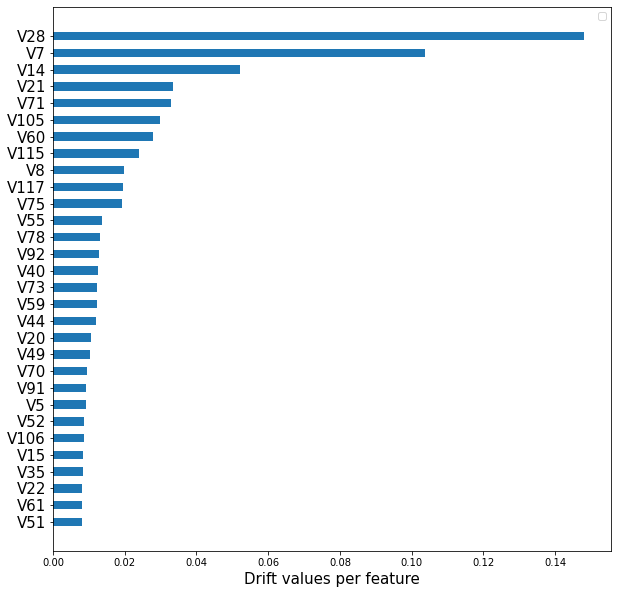

In [136]:
ade.plot_adversarial_drift_importances(n=30)

In [162]:
sample_weights_test_adversarial = (AdversarialDriftExplainer(seed=2021, feature_subset=['V25'])
                                    .fit(X_test, X_prod)
                                    .get_adversarial_correction_weights(max_ratio=10))

[0]	validation_0-error:0.31942	validation_0-auc:0.72549	validation_0-logloss:0.67476
[10]	validation_0-error:0.31885	validation_0-auc:0.73623	validation_0-logloss:0.60359
[20]	validation_0-error:0.31626	validation_0-auc:0.73717	validation_0-logloss:0.59562
[30]	validation_0-error:0.31770	validation_0-auc:0.73672	validation_0-logloss:0.59649
[38]	validation_0-error:0.31828	validation_0-auc:0.73662	validation_0-logloss:0.59813
[0]	validation_0-error:0.31606	validation_0-auc:0.73558	validation_0-logloss:0.67458
[10]	validation_0-error:0.31175	validation_0-auc:0.74124	validation_0-logloss:0.60139
[20]	validation_0-error:0.31031	validation_0-auc:0.74281	validation_0-logloss:0.58953
[30]	validation_0-error:0.31060	validation_0-auc:0.74242	validation_0-logloss:0.58853
[40]	validation_0-error:0.31002	validation_0-auc:0.74160	validation_0-logloss:0.58894
[46]	validation_0-error:0.31031	validation_0-auc:0.74066	validation_0-logloss:0.58953


In [163]:
# study the drift with the new weights on test data
drift_explainer2 = ModelDriftExplainer(clf)
drift_explainer2.fit(X1=X_test, X2=X_prod, y1=y_test, y2=y_prod,
                     sample_weights1=sample_weights_test_adversarial)

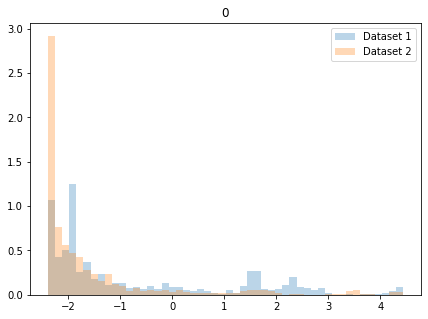

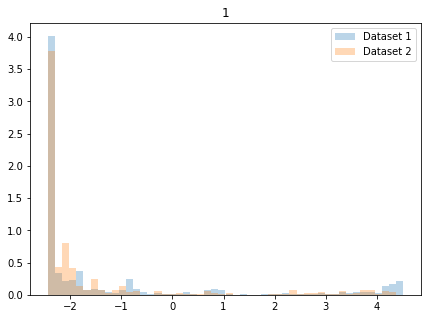

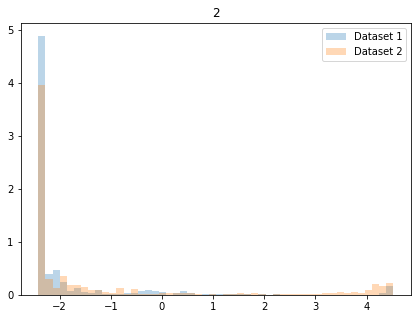

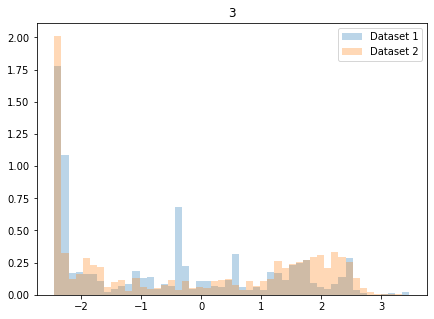

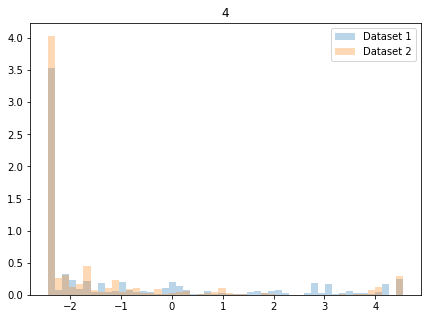

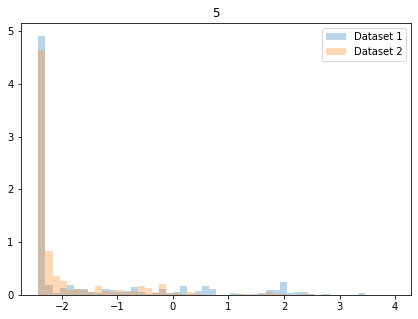

[DriftMetricsNum(mean_difference=-0.8982211608317265, wasserstein=0.8982797585696753, ks_test=BaseStatisticalTestResult(statistic=0.32599354024581745, pvalue=4.798402839845725e-165)),
 DriftMetricsNum(mean_difference=-0.341758482814541, wasserstein=0.3636083341674696, ks_test=BaseStatisticalTestResult(statistic=0.09877205693036006, pvalue=3.2065679784315827e-15)),
 DriftMetricsNum(mean_difference=0.7482895432734749, wasserstein=0.7487572114122291, ks_test=BaseStatisticalTestResult(statistic=0.19131832490983158, pvalue=3.206215604170568e-56)),
 DriftMetricsNum(mean_difference=0.4480570671775109, wasserstein=0.4546883771635017, ks_test=BaseStatisticalTestResult(statistic=0.17012898798034515, pvalue=1.7879075475346043e-44)),
 DriftMetricsNum(mean_difference=-0.5320607791560825, wasserstein=0.5374978238344404, ks_test=BaseStatisticalTestResult(statistic=0.14761564764178514, pvalue=1.538680201299006e-33)),
 DriftMetricsNum(mean_difference=-0.39294205427723594, wasserstein=0.4068767436279303

In [164]:
# with new weigts on test data, distributions of predictions are much closer
drift_explainer2.plot_prediction_drift(bins=50)
drift_explainer2.get_prediction_drift()

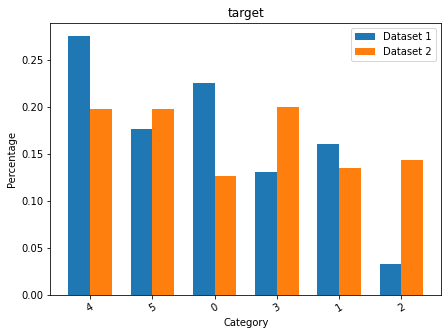

DriftMetricsCat(wasserstein=0.20111562608559191, jensen_shannon=0.18312130329787, chi2_test=Chi2TestResult(statistic=444.9900356599919, pvalue=5.914395063833713e-94, dof=5, contingency_table=             0           1           2           3           4           5
X1  781.792415  558.063099  112.846178  455.104816  955.964346  613.229146
X2  441.000000  468.000000  500.000000  694.000000  688.000000  687.000000))

In [165]:
# distribution of target if also corrected
drift_explainer2.plot_target_drift()
drift_explainer2.get_target_drift()

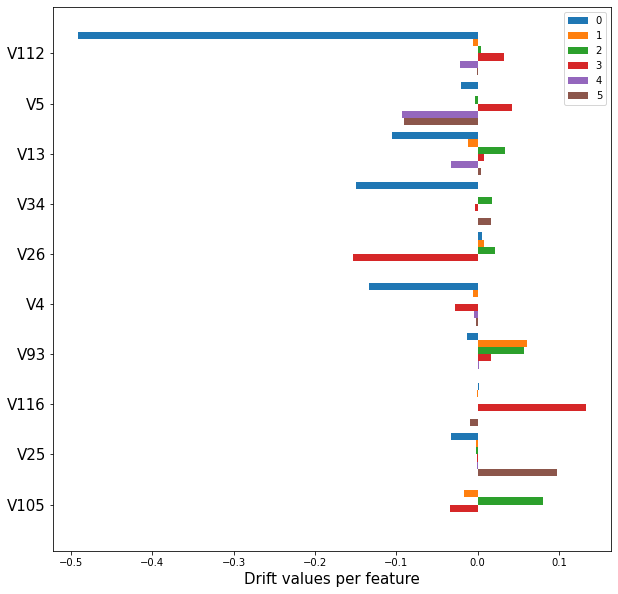

In [166]:
drift_explainer2.plot_tree_based_drift_importances(type='mean', n=10)

In [120]:
clf.feature_importances_

array([0.00382728, 0.01959389, 0.00472815, 0.00391412, 0.0079139 ,
       0.00063961, 0.00119489, 0.01065622, 0.05914885, 0.01169119,
       0.00252319, 0.01862187, 0.00742921, 0.00500778, 0.00462624,
       0.00829342, 0.01735103, 0.00181068, 0.00237971, 0.00589343,
       0.00314304, 0.00234296, 0.00044677, 0.00216218, 0.02644448,
       0.00336496, 0.01516011, 0.00217345, 0.0111098 , 0.00280804,
       0.00076262, 0.00060762, 0.00890635, 0.00346397, 0.00376907,
       0.00279048, 0.00123021, 0.00442251, 0.00046102, 0.0026662 ,
       0.0090279 , 0.00682046, 0.00073593, 0.00995516, 0.00074669,
       0.0075357 , 0.0011063 , 0.00118681, 0.00096328, 0.00714483,
       0.00016646, 0.00141674, 0.00037557, 0.00046941, 0.00086414,
       0.00143072, 0.00067388, 0.0001906 , 0.00154209, 0.00129052,
       0.00125134, 0.00032546, 0.00032475, 0.00512769, 0.05331947,
       0.00262217, 0.00842262, 0.00820002, 0.05090768, 0.01877377,
       0.00627524, 0.00338716, 0.0178536 , 0.01126072, 0.00230

In [121]:
clf.feature_names_in_

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V1

In [119]:
pd.DataFrame(clf.feature_importances_, clf.feature_names_in_).sort_values(0, ascending=False)

,0
V80,0.073754
V9,0.059149
V65,0.053319
V69,0.050908
V117,0.038619
V125,0.035834
V114,0.034050
V116,0.029340
V25,0.026444
V105,0.021704


(array([ 45.,   0.,   0.,  49.,   8.,  47.,  49., 168., 122., 148., 191.,
        312., 209., 146., 144., 239., 190., 275., 205., 148.,  93., 178.,
         54.,  15.,  69.,  86.,  49.,  14.,  22.,   8.,  11.,  37.,  17.,
          6.,   0.,  10.,   9.,   3.,   0.,   3.,  13.,   0.,   5.,  31.,
          2.,  11.,  14.,   3.,   7.,   0.,   0.,   4.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          5.]),
 array([0.17035861, 0.22130774, 0.27225687, 0.323206  , 0.37415513,
        0.42510426, 0.47605339, 0.52700252, 0.57795165, 0.62890078,
        0.67984991, 0.73079904, 0.78174817, 0.8326973 , 0.88364643,
        0.93459556, 0.98554469, 1.03649383, 1.08744296, 1.13839209,
        1.18934122, 1.24029035, 1.29123948, 1.

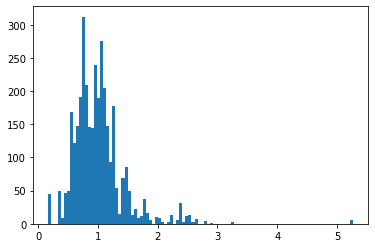

In [105]:
plt.hist(ade.get_adversarial_correction_weights(max_ratio=10), bins=100)

In [106]:
ade.get_adversarial_correction_weights(max_ratio=10)[:100]

array([1.02380555, 1.07204193, 0.86821355, 1.04710022, 0.55570665,
       1.18680647, 1.24859481, 0.93763246, 1.43261198, 1.24859481,
       1.11728389, 0.55570665, 1.01050548, 0.55570665, 1.12644607,
       1.01050548, 1.22699921, 1.49106122, 1.25053603, 0.98339692,
       1.72583462, 1.54697931, 1.26801714, 0.18338347, 0.17035861,
       0.17035861, 0.32843122, 0.17035861, 0.18338347, 0.18338347,
       0.17035861, 0.17035861, 0.18338347, 0.68313048, 0.32843122,
       0.68313048, 0.68313048, 0.68313048, 0.54224154, 0.32843122,
       0.36466553, 0.68313048, 0.99554037, 0.68313048, 0.54224154,
       0.48263502, 0.74691405, 0.90329244, 0.63460408, 0.78091871,
       0.94538981, 0.93763246, 0.78091871, 0.89146901, 0.64758441,
       0.90329244, 0.79075166, 0.51104041, 0.7948232 , 0.57109183,
       0.67453162, 0.75072889, 0.59504124, 0.78166042, 0.76997845,
       0.57109183, 0.57109183, 0.539665  , 0.50980436, 0.7948232 ,
       0.7948232 , 0.59504124, 0.64548802, 0.7948232 , 0.59504

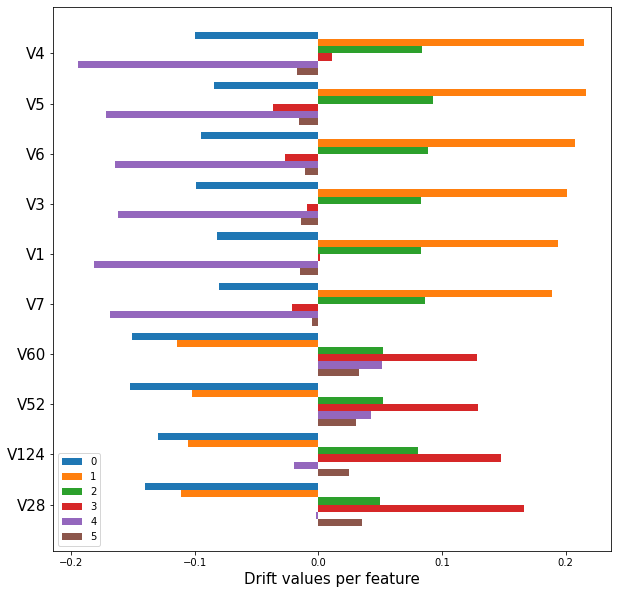

In [146]:
# plot drift values computed with the model agnostic approach
drift_explainer.plot_model_agnostic_drift_importances(type='mean', n=10, prediction_type='proba')

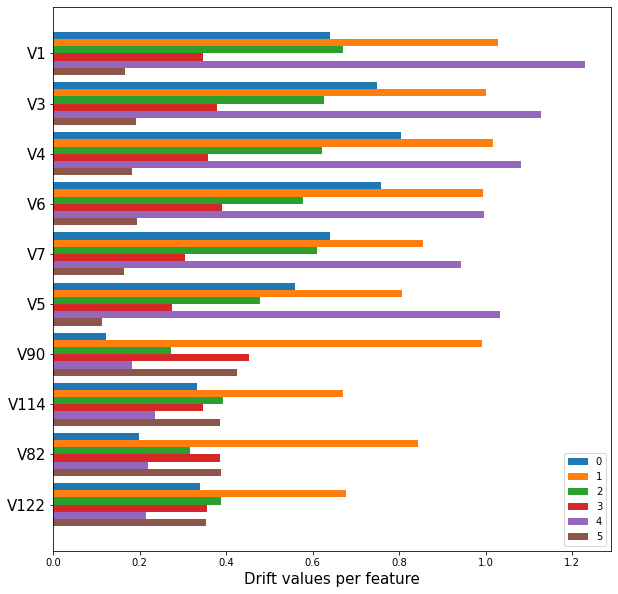

In [42]:
# plot drift values computed with the model agnostic approach
drift_explainer.plot_model_agnostic_drift_importances(type='wasserstein', n=10)

In [39]:
drift_explainer.get_feature_drift(0)

DriftMetricsNum(mean_difference=-44903.39112592516, wasserstein=44911.718643271364, ks_test=BaseStatisticalTestResult(statistic=0.3820136250042792, pvalue=1.0365e-320))

In [ ]:
drift_explainer.get_feature_drifts()